In [1]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Project structure:
# flask_app/
# ├── app.py               # Main Flask application
# ├── templates/           # Folder for HTML templates
# │   └── form.html        # HTML form for user input
# └── static/              # (Optional) Folder for CSS, JS, or other static files

In [3]:
from flask import Flask, render_template, request, redirect, url_for, flash

app = Flask(__name__)
app.secret_key = 'your_secret_key'  

# Route to display the form
@app.route('/')
def form():
    return render_template('form.html')

# Route to handle form submission
@app.route('/submit', methods=['POST'])
def submit():
    # Retrieve data from the form
    name = request.form.get('name')
    email = request.form.get('email')
    message = request.form.get('message')

    # Basic validation
    if not name or not email or not message:
        flash('Please fill out all fields!', 'error')
        return redirect(url_for('form'))

    # Process the data 
    # For demonstration, we'll just print it to the console
    print(f"Name: {name}, Email: {email}, Message: {message}")

    # Flash a success message
    flash('Form submitted successfully!', 'success')
    return redirect(url_for('form'))

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\arubombora\AppData\Local\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [4]:
from flask import Flask, render_template_string, request, flash, redirect, url_for
from IPython.display import display, HTML

# Create a Flask app
app = Flask(__name__)
app.secret_key = "supersecretkey"  # Needed for flash messages

# HTML Template as a String
html_template = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Simple Webpage</title>
    <style>
        body { font-family: Arial, sans-serif; margin: 20px; }
        .form-group { margin-bottom: 15px; }
        label { display: block; margin-bottom: 5px; }
        input, textarea { width: 100%; padding: 8px; box-sizing: border-box; }
        button { padding: 10px 15px; background-color: #4CAF50; color: white; border: none; cursor: pointer; }
        .flash-message { margin-top: 20px; padding: 10px; border-radius: 5px; }
        .success { background-color: #d4edda; color: #155724; }
        .error { background-color: #f8d7da; color: #721c24; }
    </style>
</head>
<body>
    <h1>User Data Collection</h1>
    {% with messages = get_flashed_messages(with_categories=true) %}
        {% if messages %}
            <div>
                {% for category, message in messages %}
                    <p class="flash-message {{ category }}">{{ message }}</p>
                {% endfor %}
            </div>
        {% endif %}
    {% endwith %}

    <form action="{{ url_for('submit') }}" method="POST">
        <div class="form-group">
            <label for="name">Name:</label>
            <input type="text" id="name" name="name" required>
        </div>
        <div class="form-group">
            <label for="email">Email:</label>
            <input type="email" id="email" name="email" required>
        </div>
        <div class="form-group">
            <label for="message">Message:</label>
            <textarea id="message" name="message" rows="5" required></textarea>
        </div>
        <button type="submit">Submit</button>
    </form>
</body>
</html>
"""

# Define routes
@app.route("/")
def index():
    return render_template_string(html_template)

@app.route("/submit", methods=["POST"])
def submit():
    name = request.form.get("name")
    email = request.form.get("email")
    message = request.form.get("message")

    if name and email and message:
        flash("Form submitted successfully!", "success")
    else:
        flash("All fields are required!", "error")
    
    return redirect(url_for("index"))

# Run Flask in a background thread
import threading

def run_flask():
    app.run(port=5000, debug=False, use_reloader=False)

thread = threading.Thread(target=run_flask)
thread.start()

# Display link to access the web app
display(HTML("<a href='http://127.0.0.1:5000' target='_blank'>Open Web App</a>"))


 * Serving Flask app '__main__'


 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [8]:
# Create a python class named 'User'
class User:
    def __init__(self, name, age, gender):
        self.name = name  
        self.age = age    
        self.gender = gender  

    def __str__(self):
                return f"User(name={self.name}, age={self.age}, gender={self.gender})"

# Create an instance of the User class
user_instance = User(name="User", age=40, gender="male")

# Print the created instance
print(user_instance)



User(name=User, age=40, gender=male)


In [9]:
import pandas as pd
df = pd.read_csv(r"C:\Users\arubombora\Desktop\Cc\User Data.csv")
df.head()  # Shows the first 5 rows

,Name,Age,Gender,Total Income (UGX),Total Expenses (UGX),Utilities (UGX),Entertainment (UGX),School Fees (UGX),Shopping (UGX),Healthcare (UGX)
0,Abwooli,50,Male,8368037,2295281,182624,45970,992945,679769,393973
1,Agaba,52,Female,2455360,1918272,431419,105211,515790,521034,344818
2,Ainembabazi,29,Male,1479841,1479839,222352,77073,869114,200741,110559
3,Akankwasa,37,Male,2521014,2130956,464107,189407,966481,285721,225240
4,Akello,65,Female,7027979,2696154,354895,249132,1412436,378459,301232


In [10]:
df.head(100)  # Show all the 100 rows


,Name,Age,Gender,Total Income (UGX),Total Expenses (UGX),Utilities (UGX),Entertainment (UGX),School Fees (UGX),Shopping (UGX),Healthcare (UGX)
0,Abwooli,50,Male,8368037,2295281,182624,45970,992945,679769,393973
1,Agaba,52,Female,2455360,1918272,431419,105211,515790,521034,344818
2,Ainembabazi,29,Male,1479841,1479839,222352,77073,869114,200741,110559
3,Akankwasa,37,Male,2521014,2130956,464107,189407,966481,285721,225240
4,Akello,65,Female,7027979,2696154,354895,249132,1412436,378459,301232
...,...,...,...,...,...,...,...,...,...,...
95,Tumwebaze,44,Female,6497562,2139241,403256,116229,971767,206789,441200
96,Turyasingura,28,Female,5673522,2108316,183739,41732,956588,620639,305618
97,Tusiime,19,Male,6641502,2652407,184652,254203,1655724,87704,470124
98,Wamala,32,Female,7594367,2203659,223243,21690,1487371,301019,170336


C:\Users\arubombora\AppData\Local\Temp\1\ipykernel_22260\434497461.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


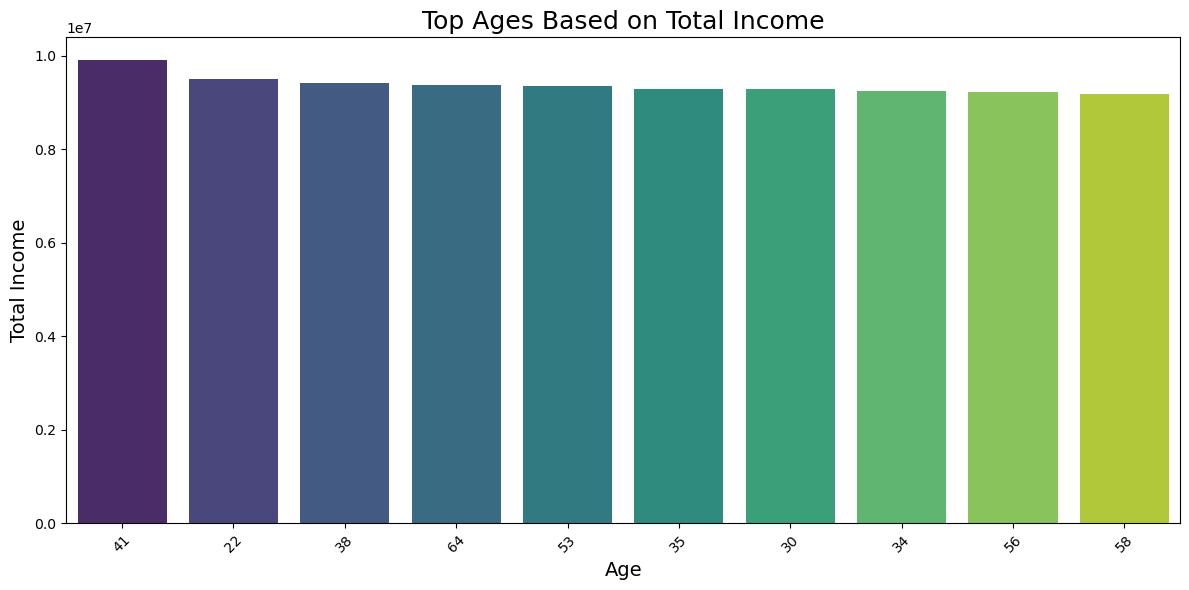

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\arubombora\Desktop\Cc\User Data.csv"
data = pd.read_csv(file_path)

# Sort the data by "Total Income" in descending order
sorted_data = data.sort_values(by="Total Income (UGX)", ascending=False)

# Select the top 10 ages with the highest incomes
top_ages = sorted_data.head(10)

# Sort the ages in descending order based on "Total Income (UGX)"
top_ages = top_ages.sort_values(by="Total Income (UGX)", ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_ages,
    x="Age",
    y="Total Income (UGX)",
    palette="viridis",
    order=top_ages["Age"]  # Explicitly arrange x-axis in descending order
)

# Customize the plot
plt.title("Top Ages Based on Total Income", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Total Income", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file
output_path = r"C:\Users\arubombora\Desktop\Cc\User Data.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")  # Save as PNG with high resolution

# Show the plot
plt.show()

C:\Users\arubombora\AppData\Local\Temp\1\ipykernel_22260\3569331641.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


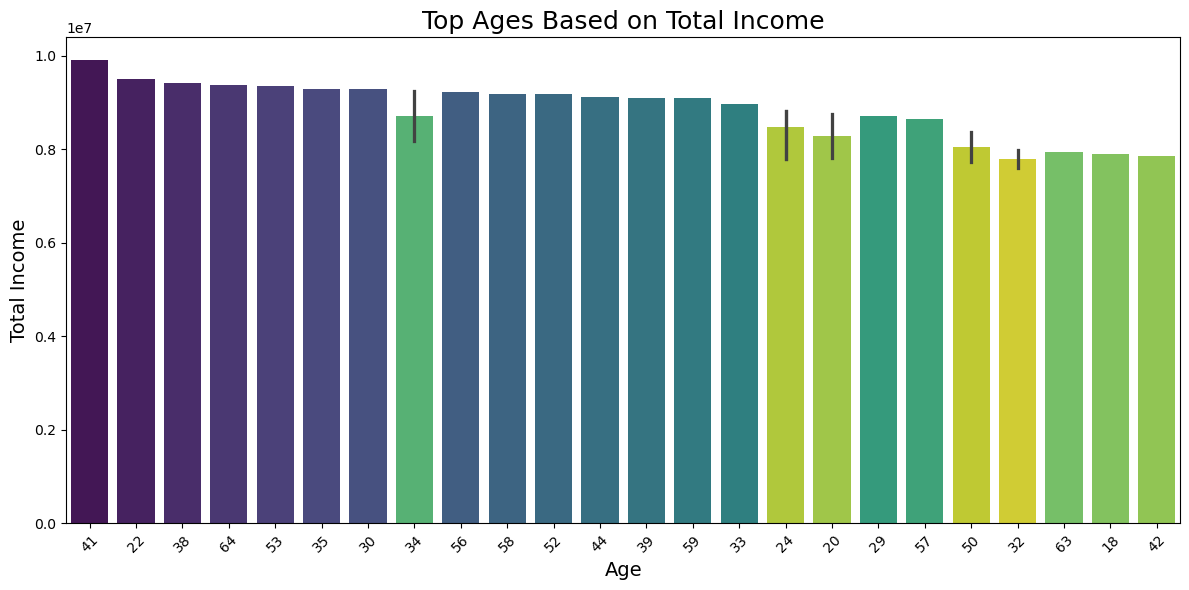

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\arubombora\Desktop\Cc\User Data.csv"
data = pd.read_csv(file_path)

# Sort the data by "Total Income" in descending order
sorted_data = data.sort_values(by="Total Income (UGX)", ascending=False)

# Select the top 30 ages with the highest incomes
top_ages = sorted_data.head(30)

# Sort the ages in descending order based on "Total Income (UGX)"
top_ages = top_ages.sort_values(by="Total Income (UGX)", ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_ages,
    x="Age",
    y="Total Income (UGX)",
    palette="viridis",
    order=top_ages["Age"]  # Explicitly arrange x-axis in descending order
)

# Customize the plot
plt.title("Top Ages Based on Total Income", fontsize=18)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Total Income", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Save the plot as an image file
output_path = r"C:\Users\arubombora\Desktop\Cc\User Data.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")  # Save as PNG with high resolution

# Show the plot
plt.show()

C:\Users\arubombora\AppData\Local\Temp\1\ipykernel_22260\1916010227.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = top_ages.groupby('Age Group')['Total Income (UGX)'].sum().reset_index()
C:\Users\arubombora\AppData\Local\Temp\1\ipykernel_22260\1916010227.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


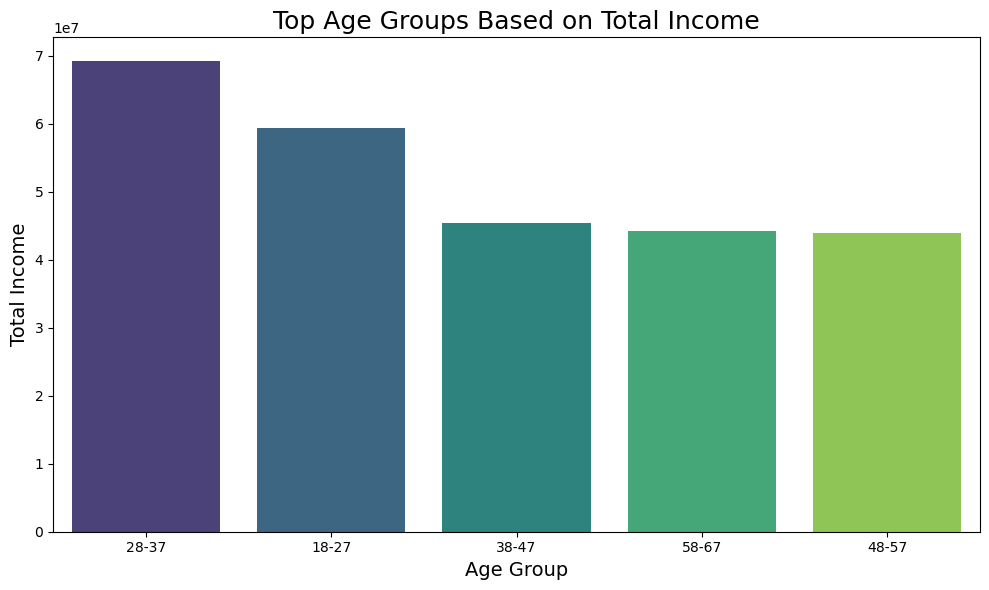

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\arubombora\Desktop\Cc\User Data.csv"
data = pd.read_csv(file_path)

# Define age bins and labels
age_bins = [17, 27, 37, 47, 57, 67]  # Define the boundaries for the bins
age_labels = ["18-27", "28-37", "38-47", "48-57", "58-67"]  # Labels for each bin

# Create a new column 'Age Group' to categorize ages into bins
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Sort the data by "Total Income" in descending order
sorted_data = data.sort_values(by="Total Income (UGX)", ascending=False)

# Select the top 30 entries with the highest incomes
top_ages = sorted_data.head(30)

# Group by 'Age Group' and calculate the total income for each group
grouped_data = top_ages.groupby('Age Group')['Total Income (UGX)'].sum().reset_index()

# Sort the grouped data by total income in descending order
grouped_data = grouped_data.sort_values(by="Total Income (UGX)", ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=grouped_data,
    x="Age Group",
    y="Total Income (UGX)",
    palette="viridis",
    order=grouped_data['Age Group']  # Explicitly arrange x-axis based on grouped data
)

# Customize the plot
plt.title("Top Age Groups Based on Total Income", fontsize=18)
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Total Income", fontsize=14)
plt.xticks(rotation=0)  
plt.tight_layout()

# Save the plot as an image file
output_path = r"C:\Users\arubombora\Desktop\Cc\User Data.png"
plt.savefig(output_path, dpi=300, bbox_inches="tight")  

# Show the plot
plt.show()

In [ ]:
if __name__ == '__main__':
    import os
    port = int(os.environ.get('PORT', 5000))  # Use PORT environment variable
    app.run(host='0.0.0.0', port=port)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.20.155:5000
Press CTRL+C to quit
192.168.20.155 - - [21/Feb/2025 07:53:02] "GET / HTTP/1.1" 200 -
192.168.20.155 - - [21/Feb/2025 07:53:02] "GET /favicon.ico HTTP/1.1" 404 -
192.168.20.155 - - [21/Feb/2025 07:53:17] "GET / HTTP/1.1" 200 -
